# Маркетинговая аналитика в Яндекс.Афише

Задача: помочь маркетологам из Яндекс.Афиши снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.

Данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:
* лог сервера с данными о посещениях сайта Яндекс.Афиши,
* выгрузка всех заказов за этот период,
* статистика рекламных расходов.

Было изучено:
* как клиенты пользуются сервисом,
* когда делают первые покупки на сайте,
* сколько денег приносит компании каждый клиент,
* когда расходы на привлечение клиента окупаются.

Выручка измеряется в условных единицах — у.е.

## Навигация <a id="navigation"></a>

1. [Загрузка данных и подготовка к анализу.](#opening)
  * 1.1 [Создание переменных и изучение информации.](#info)
  * 1.2 [Изменение типов данных.](#types)
 * [Вывод.](#openingsum)
 
 
2. [Расчет метрик и построение графиков.](#metrics)
  * 2.1 [Продуктовые метрики.](#products)
    * 2.1.1 [DAU, WAU и MAU. Средние значения и изменение во времени.](#dau)
    * 2.1.2 [Среднее количество визитов пользователей в день, график изменения во времени. ](#sess_day)
    * 2.1.3 [Средняя продолжительность сессии и распределение по пользователям.](#dur_sess)
    * 2.1.4 [Retention Rate с применением когортного анализа.](#rr)
  * [Продуктовые метрики. Вывод](#productssum)
  * 2.2 [Метрики электронной коммерции.](#electronics)
    * 2.2.1 [Среднее время от первого визита до покупки.](#time_order)
    * 2.2.2 [Среднее количество покупок на одного клиента за 6 месяцев, расчет с применением когортного анализа.](#cnt_order)
    * 2.2.3 [Средняя выручка с пользователя и изменение во времени.](#rev_user)
    * 2.2.4 [Расчет LTV по когортам.](#ltv)
  * [Метрики электронной коммерции. Вывод](#electronicssum)
  * 2.3 [Маркетинговые метрики.](#marketing)
    * 2.3.1 [Распределение расходов на маркетинг.](#revenues)
    * 2.3.2 [САС](#cac)
    * 2.3.3 [ROMI](#romi)
  * [Маркетинговые метрики. Вывод](#marketingsum)
    
 
3. [Выводы и рекомендации.](#bigsum)
  * 3.1 [Наиболее важные источники трафика и тип устройств.](#important)
  * 3.2 [Выводы по маркетинговым и продуктовым метрикам и метрик электронной коммерции.](#diff_metrics)
  * 3.3 [Итоги когортного анализа. Наиболее перспективные для компании когорты клиентов.](#cohortssum)
  * 3.4 [Отличия метрик в разрезе устройств.](#metr_source)

## 1. Загрузка данных и подготовка к анализу <a id="opening"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
from scipy import stats as st
import numpy as np 
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

### 1.1 Создание переменных и изучение информации <a id="info"></a>

In [2]:
visits = pd.read_csv('')
orders = pd.read_csv('')
costs = pd.read_csv('')

data_list = [visits, orders, costs]
for element in data_list:
    display(element.head(10))
    display(element.describe())
    element.info()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


### 1.2 Изменение типов данных <a id="types"></a>

Приведем все даты из таблиц к формату datetime.

In [3]:
visits['End Ts'] = pd.to_datetime(visits['End Ts'], 
                                  format='%Y-%m-%d %H:%M:%S')
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'], 
                                    format='%Y-%m-%d %H:%M:%S')
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'], 
                                  format='%Y-%m-%d %H:%M:%S')
costs['dt'] = pd.to_datetime(costs['dt'], 
                             format='%Y-%m-%d')

for element in data_list:
    element.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null datetime64[ns]
Source Id    359400 non-null int64
Start Ts     359400 non-null datetime64[ns]
Uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null datetime64[ns]
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [4]:
# перед проверкой на дубликаты приведем столбец с типом данных object к нижнему регистру
visits['Device'] = visits['Device'].str.lower()

for element in data_list:
    display(element.duplicated().sum())

0

0

0

### Вывод <a id="openingsum"></a>

Были получены три таблицы - визиты пользователей, покупки и расходы. Пропусков в таблицах нет. Был изменен тип данных во всех строчках с датами. 


* [В начало](#navigation)

## 2. Рассчет метрик и построение графиков <a id="metrics"></a>

### 2.1 Продуктовые метрики <a id="products"></a>

### 2.1.1 DAU, WAU и MAU. Средние значения и изменение во времени. <a id="dau"></a>

Функция для извлечения частей даты из таблиц (увы, не пригодилась).

In [5]:
def parts_from_date(data, column):
    data['year'] = pd.DatetimeIndex(data[column]).year
    data['month'] = data[column].astype('datetime64[M]')
    data['week'] = pd.DatetimeIndex(data[column]).week
    data['date'] = data[column].astype('datetime64[D]')
    
parts_from_date(visits, 'Start Ts')
display(visits.head(5))

,Device,End Ts,Source Id,Start Ts,Uid,year,month,week,date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,52,2017-12-27


Рассчитаем DAU, MAU, WAU для всех данных. Рассчитаем DAU для разных источников трафика.

In [6]:
dau = (visits.groupby('date')
             .agg({'Uid': 'nunique'})
             .mean()
      )
wau = (visits.groupby(['year', 'week'])
             .agg({'Uid': 'nunique'})
             .mean()
      )
mau = (visits.groupby(['year', 'month'])
             .agg({'Uid': 'nunique'})
             .mean()
      )

print('DAU =', int(dau))
print('MAU =', int(mau))
print('WAU =', int(wau))

DAU = 907
MAU = 23228
WAU = 5716


In [7]:
# отфильтруем данные и посчитаем DAU 
desktop = visits.query('Device == "desktop"')
touch = visits.query('Device == "touch"')
dau_desktop = (desktop.groupby('date')
                      .agg({'Uid': 'nunique'})
                      .mean()
               )
dau_touch = (touch.groupby('date')
                  .agg({'Uid': 'nunique'})
                  .mean()
            ) 
print('DAU desktop =', int(dau_desktop))
print('DAU touch =', int(dau_touch))

DAU desktop = 659
DAU touch = 252


### Вывод

DAU = 907. 

WAU = 5716. 

MAU = 23228
Количество уникальных пользователей в месяц больше чем в неделю и в день, это значит, что оно растет более-менее равномерно.

Количество уникальных пользователей, заходящих с ПК - 659, а с телефона - 252. То есть, можно говорить о том, что пользователи чаще заходят с ПК.


Функция для построения графика, гистограммы и тепловой карты. 

In [8]:
def plot(x, y, name, labelx, labely, numberx, numbery, color):
    fig, ax = plt.subplots()
    ax.plot(x, y, marker='o', color=color)
    ax.grid()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(numberx))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(numbery))
    ax.set_title(name, fontsize=20)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    fig.set_figwidth(20)
    fig.set_figheight(12)
    plt.show()
    
def hist(data, column, color, title, xlabel, ylabel):
    data[column].hist(bins=50, color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def heatmap(data, title, xlabel):
    sns.set(style='white')
    plt.figure(figsize=(13, 9))
    plt.title(title)
    ax = sns.heatmap(data, annot=True, fmt='.1%', linewidths=1, linecolor='gray')
    ax.set_xlabel(xlabel)
    plt.show()

Выделим часть данных для построения графика изменения DAU, применим функцию. Аналогично с MAU и WAU. 

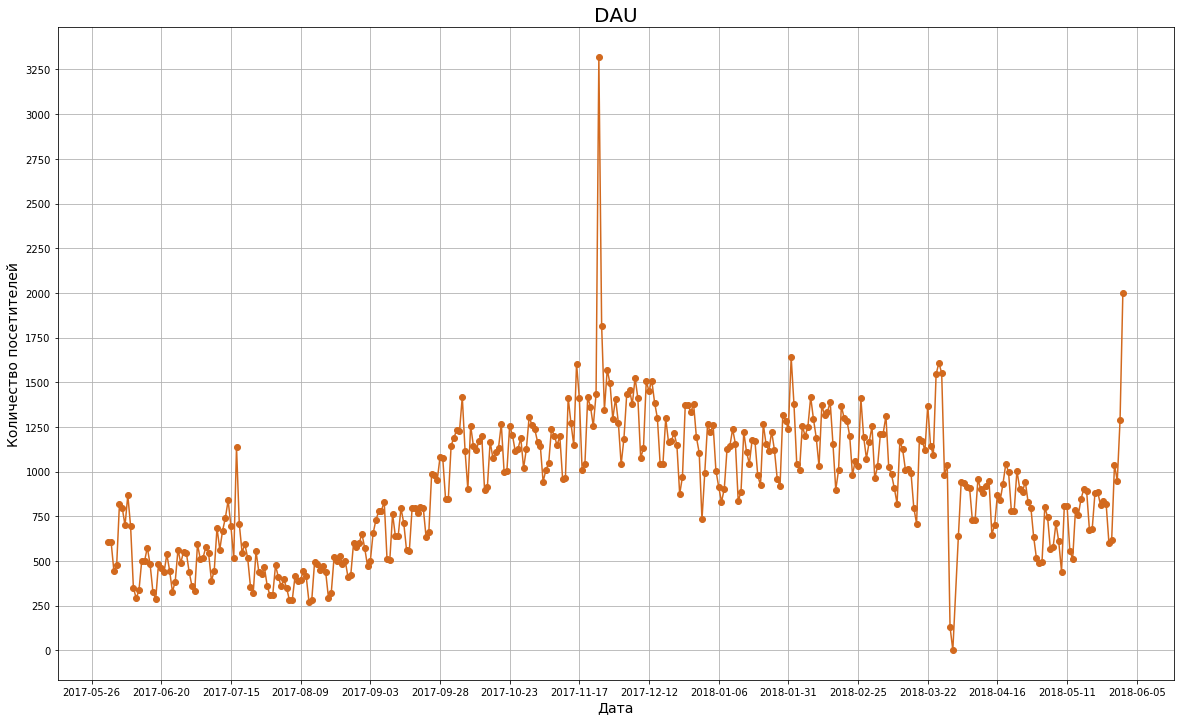

In [9]:
dau_data = (visits.groupby('date')
                  .agg({'Uid': 'nunique'})
                  .reset_index()
           )
x_dau = dau_data['date']
y_dau = dau_data['Uid']

plot(x_dau, 
     y_dau, 
     'DAU', 
     'Дата', 
     'Количество посетителей', 
     25, 
     250, 
     'chocolate')

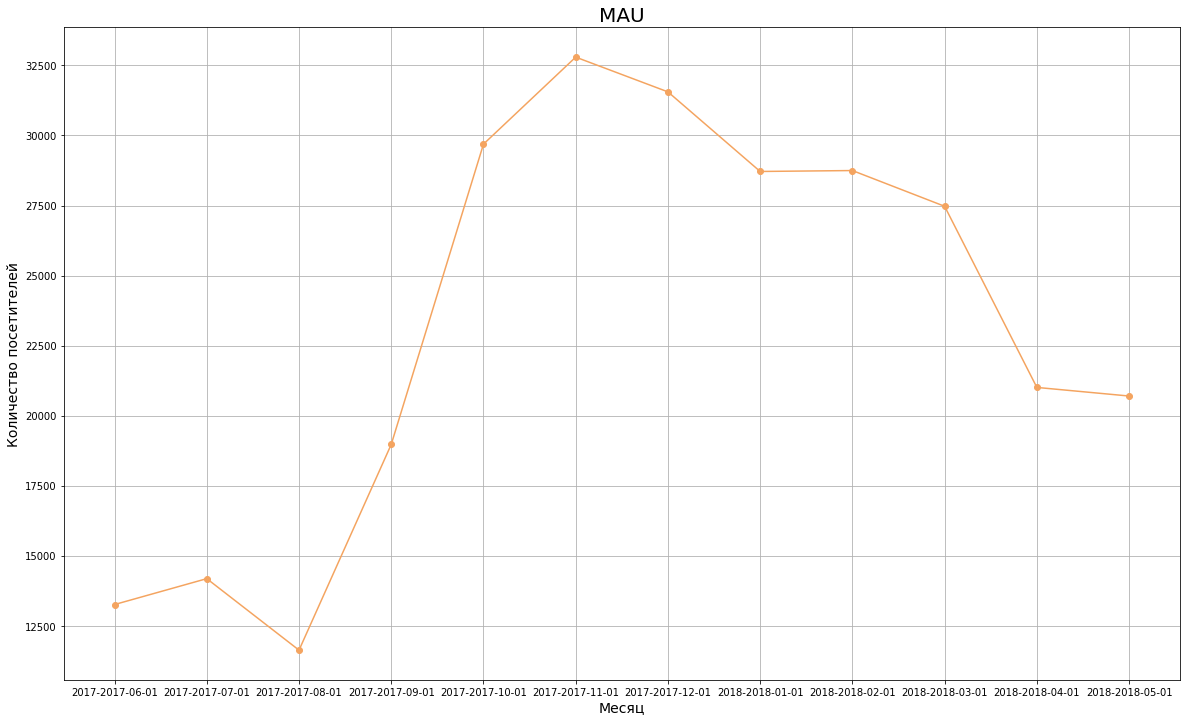

In [10]:
# выделим часть данных
mau_data = (visits.groupby(['year', 'month'])
                  .agg({'Uid': 'nunique'})
                  .reset_index()
           )

# добавим столбец, где будет год и месяц для удоства подписи оси графика
mau_data = mau_data.assign(year_month = mau_data['year'].astype(str) + '-' + mau_data['month'].astype(str))
x_mau = mau_data['year_month']
y_mau = mau_data['Uid']

# применим функцию
plot(x_mau, 
     y_mau, 
     'MAU', 
     'Месяц', 
     'Количество посетителей', 
     1, 
     2500, 
     'sandybrown')


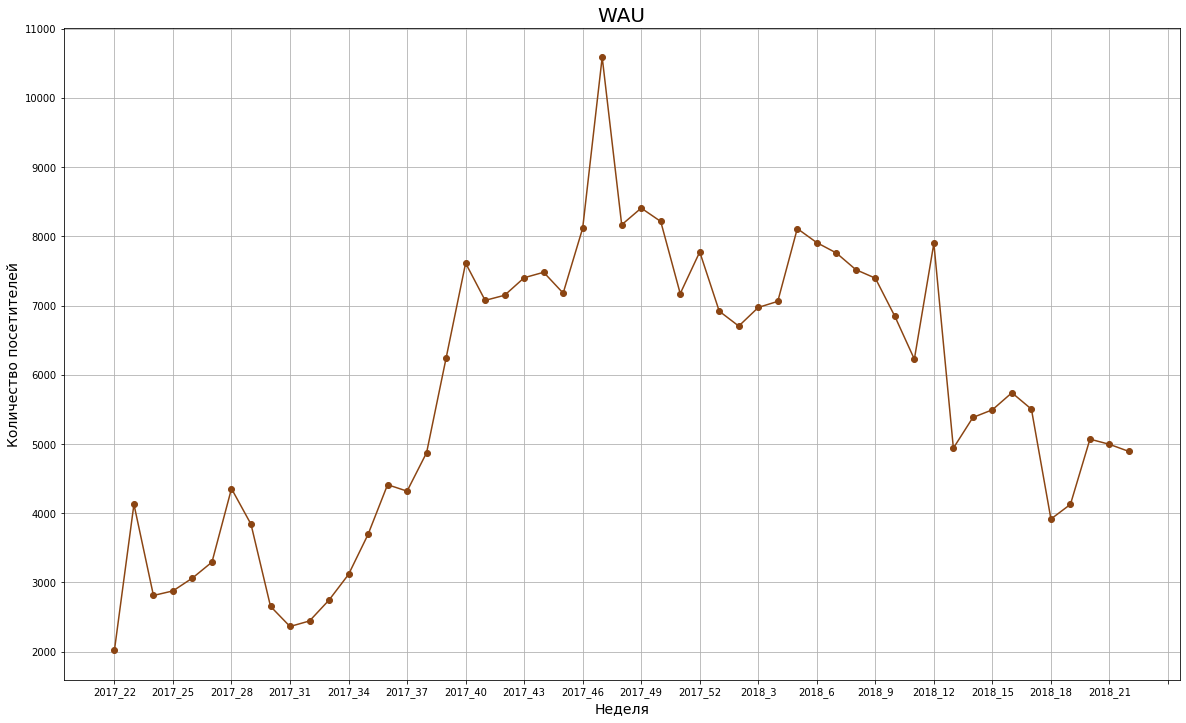

In [11]:
wau_data = (visits.groupby(['year', 'week'])
                  .agg({'Uid': 'nunique'})
                  .reset_index()
           )
wau_data = wau_data.assign(year_week = wau_data['year'].astype(str) + '_' + wau_data['week'].astype(str))

x_wau = wau_data['year_week']
y_wau = wau_data['Uid']

plot(x_wau, 
     y_wau, 
     'WAU', 
     'Неделя', 
     'Количество посетителей', 
     3, 
     1000, 
     'saddlebrown')

### Вывод

На графиках DAU, WAU и MAU можно увидеть, что все показатели повышаются с сентября 2017 года по март 2018 года. Это может говорить о сезонности сервиса. В холодное время года он более востребован.

На графиках видны пиковые значения, как высокие, так и низкие. Это может быть выбросами, а может говорить о действительных колебаниях в посетителях.

### 2.1.2 Среднее количество визитов пользователей в день, график изменения во времени. <a id="sess_day"></a>

Так как потом будет необходимо посчитать среднее количество визитов в день для разных источников трафика, создадим функцию.

Сначала посчитаем общее среднее количество визитов пользователей в день и построим график. Затем посчитаем среднее количество визитов для разных источников трафика.

In [12]:
def sess_day(data):
    # Посчитаем общее количество посещений и разделим на количество уникальных пользователей
    sessions_per_day = (data.groupby('date')
                            .agg({'Uid': ['count', 'nunique']})
                        )
    sessions_per_day.columns = ['n_sessions', 'n_users']
    sessions_per_day['sessions_per_day'] = sessions_per_day['n_sessions'] / sessions_per_day['n_users']

sessions_per_day = sess_day(visits)
sessions_per_day

1.082169644003972

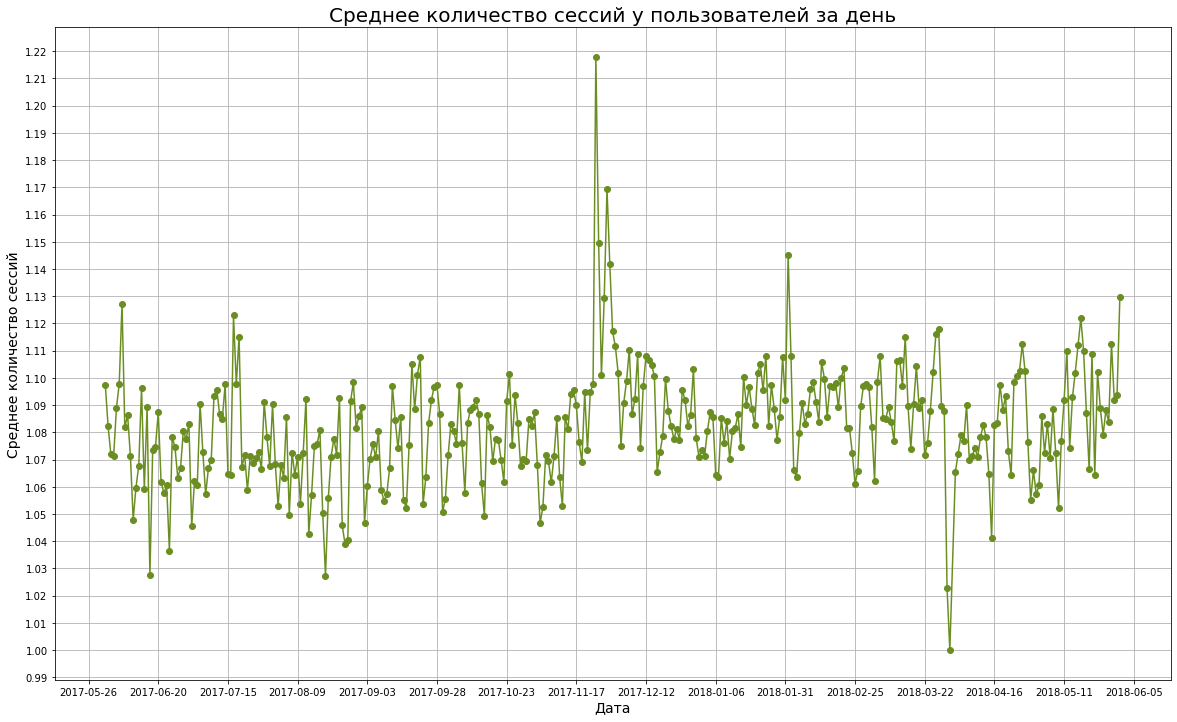

In [13]:
# Посчитаем общее количество посещений и разделим на количество уникальных пользователей
sessions_per_day = (visits.groupby('date')
                        .agg({'Uid': ['count', 'nunique']})
                        )
sessions_per_day.columns = ['n_sessions', 'n_users']
sessions_per_day['sessions_per_day'] = sessions_per_day['n_sessions'] / sessions_per_day['n_users']

mean_sess_per_day = sessions_per_day['sessions_per_day'].mean()
display(mean_sess_per_day)

# зададим данные для графика и построим его
sessions_per_day.reset_index(inplace=True)
x_sess_day = sessions_per_day['date']
y_sess_day = sessions_per_day['sessions_per_day']

plot(x_sess_day, 
     y_sess_day, 
     'Среднее количество сессий у пользователей за день', 
     'Дата', 
     'Среднее количество сессий', 
     25, 
     0.01, 
     'olivedrab')

Посчитаем среднее количество визитов для разных источников трафика. Подходящие срезы были созданы в пункте 2.1.1

In [14]:
def sess_day(data):
    sessions_per_day = (data.groupby('date')
                            .agg({'Uid': ['count', 'nunique']})
                        )
    sessions_per_day.columns = ['n_sessions', 'n_users']
    sessions_per_day['sessions_per_day'] = sessions_per_day['n_sessions'] / sessions_per_day['n_users']
    mean_sess_per_day = sessions_per_day['sessions_per_day'].mean()
    display(mean_sess_per_day)
    
sess_day(desktop)
sess_day(touch)

1.0889553115247612

1.0510715741665035

### Вывод

Среднее количество визитов в день = 1,08. Судя по графику, разборс небольшой, однако пиковые значения сохраняются. Пользователю нет необходимости повторно возвращаться на сайт, он все делает за один визит.

В разбивке по устройствам мы видим, что среднее количество визитов в день с ПК - 1,09, а с телефона - 1,05. Разница между устройствами небольшая.


### 2.1.3 Средняя продолжительность сессии и распределение по пользователям. <a id="dur_sess"></a>

Так как потом будет необходимо посчитать среднее количество визитов в день для разных источников трафика, посчитаем сначала общую среднюю продолжительность, а затем - в разбивке по источникам. 

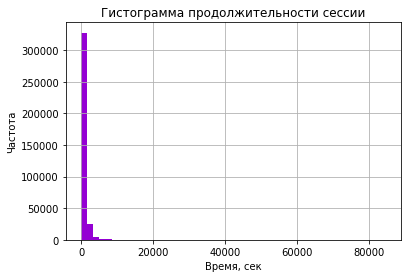

ASL = 0    60
dtype: int64


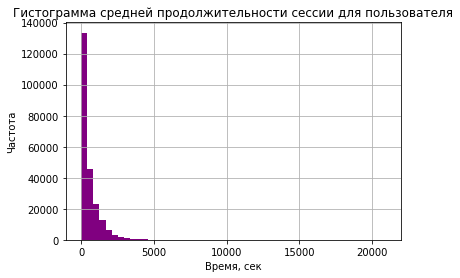

0    60
dtype: int64

In [15]:
# выясним продолжительность сессии в секундах и построим гистограмму
visits['session_duration_sec'] = (visits['End Ts'] - visits['Start Ts']).dt.seconds
hist(visits, 
     'session_duration_sec', 
     'darkviolet', 
     'Гистограмма продолжительности сессии', 
     'Время, сек',
     'Частота')

# применяем моду, поскольку распределение ненормальное
asl = visits['session_duration_sec'].mode()
print('ASL =', asl)

# средняя продолжительность сессии для пользователя
sess_per_uid = visits.groupby('Uid').agg({'session_duration_sec': 'mean'})
sess_per_uid.reset_index(inplace=True)
sess_per_uid['session_duration_sec'] = sess_per_uid['session_duration_sec'].astype(int)

hist(sess_per_uid, 
     'session_duration_sec', 
     'purple', 
     'Гистограмма средней продолжительности сессии для пользователя', 
     'Время, сек',
     'Частота')
sess_per_uid['session_duration_sec'].mode()

In [16]:
# сгруппируем по источникам трафика и посчитаем моду

desktop['session_duration_sec'] = (desktop['End Ts'] - desktop['Start Ts']).dt.seconds
touch['session_duration_sec'] = (touch['End Ts'] - touch['Start Ts']).dt.seconds
asl_desktop = desktop['session_duration_sec'].mode()
asl_touch = touch['session_duration_sec'].mode()
display(asl_desktop)
asl_touch

0    60
dtype: int64

0    60
dtype: int64

### Вывод

В среднем, визит длится 60 секунд. Мы аналогичную длительность визитов и в разбивке по пользователям. Но мы не знаем, можно ли совершить заказ за 60 секунд. Если можно, то такое среднее говорит нам, что сервис работает хорошо.

### 2.1.4 Retention Rate с применением когортного анализа <a id="rr"></a>

In [17]:
# добавим в Series дату первого визита, переименуем и присоединим к visits
first_visit_date_by_customers = visits.groupby(['Uid'])['Start Ts'].min()
first_visit_date_by_customers.name = 'first_visit'
visits = visits.join(first_visit_date_by_customers,on='Uid')

In [18]:
# округлим дату первого визита до месяца
visits['first_visit_month'] = visits['first_visit'].astype('datetime64[M]')

# вычислим lifetime когорты, округлим, чтобы не потерять данные
visits['cohort_lifetime'] = visits['month'] - visits['first_visit_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].apply(np.round).astype('int') 

# проверим, что все идет по плану
visits.head()

# посчитаем количество пользователей в каждой когорте
cohorts = (visits.groupby(['first_visit_month','cohort_lifetime'])
                 .agg({'Uid':'nunique'})
                 .reset_index()
          )

# выясним исходное количество пользователей в когорте (на 0 неделю)
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month','Uid']]
initial_users_count = initial_users_count.rename(columns={'Uid':'cohort_users'}) 

# соединим с данными об исходном количестве пользователей
cohorts = cohorts.merge(initial_users_count,on='first_visit_month') 
cohorts

,first_visit_month,cohort_lifetime,Uid,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259
...,...,...,...,...
73,2018-03-01,1,861,20589
74,2018-03-01,2,557,20589
75,2018-04-01,0,15709,15709
76,2018-04-01,1,760,15709


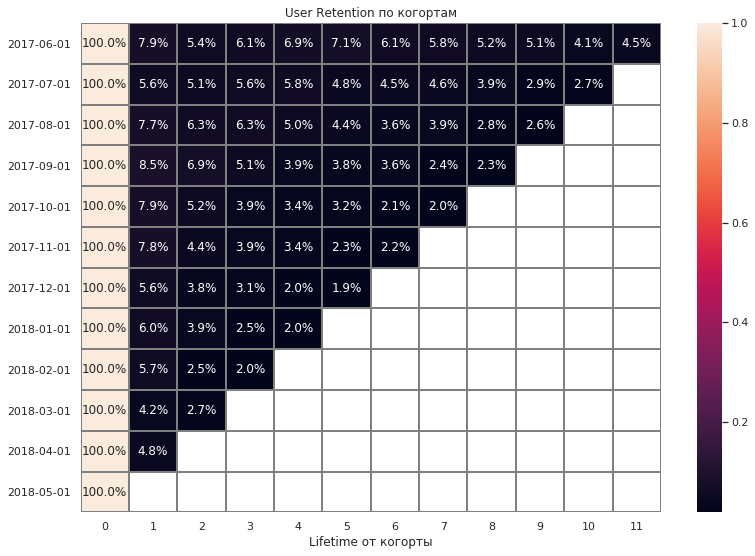

In [19]:
# посчитаем retention, поделив текущее количество пользователей на изначальное 
cohorts['retention'] = cohorts['Uid']/cohorts['cohort_users']

# свобдная таблица для построения тепловой карты, сгруппируем по когортам, для каждого месяца
# lifetime посчитаем сумму retention
retention_pivot = cohorts.pivot_table(index='first_visit_month',
                                      columns='cohort_lifetime',
                                      values='retention',
                                      aggfunc='sum')

# приведем дату к удобному формату и построим тепловую карту
retention_pivot.index = retention_pivot.index.strftime('%Y-%m-%d')

heatmap(retention_pivot, 'User Retention по когортам', 'Lifetime от когорты')

### Вывод

Мы видим, что коэффициент удержания медленно снижается с увеличением времени жизни когорты. Покупатели все меньше возвращаются, чтобы сделать заказ. Начиная с октября 2017 (когорты 2017-10), коэффициент начал сильно снижаться, больше, чем было раньше. Это может быть связано с обновлением сервиса или в целом со снижением его популярности.

### Продуктовые метрики. Вывод <a id="productssum"></a>

* 2.1.1 DAU, WAU и MAU. Средние значения и изменение во времени.
DAU = 907. WAU = 5716. MAU = 23228

Количество уникальных пользователей в месяц больше чем в неделю и в день, это значит, что оно растет более-менее равномерно. 

Все показатели повышаются с сентября 2017 года по март 2018 года. Это может говорить о сезонности сервиса. В холодное время года он более востребован.

На графиках видны пиковые значения, как высокие, так и низкие. Это может быть выбросами, а может говорить о действительных колебаниях в посетителях. 

* 2.1.2 Среднее количество визитов пользователей в день, график изменения во времени.

Среднее количество визитов в день = 1. Судя по графику, разборс небольшой, однако пиковые значения сохраняются. Пользователю нет необходимости повторно возвращаться на сайт, он все делает за один визит. 

* 2.1.3 Средняя продолжительность сессии и распределение по пользователям.

В среднем, визит длится 60 секунд. Мы видим большое количество коротких визитов и среди пользователей. Мы не знаем, можно ли совершить заказ за 60 секунд. Если можно, то такое среднее говорит нам, что сервис работает хорошо. 

* 2.1.4 Retention Rate с применением когортного анализа.

Мы видим, что коэффициент удержания медленно снижается с увеличением времени жизни когорты. Покупатели все меньше возвращаются, чтобы сделать заказ. Начиная с октября 2017 (когорты 2017-10), коэффициент начал сильно снижаться, больше, чем было раньше. Это может быть связано с обновлением сервиса или в целом со снижением его популярности. 

* [В начало](#navigation)

### 2.2 Метрики электронной коммерции <a id="electronics"></a>

### 2.2.1 Среднее время от первого визита до покупки <a id="time_order"></a>

In [20]:
# создадим Series с датой первого заказа и переименуем ее
first_order_date_by_customers = orders.groupby('Uid')['Buy Ts'].min() 
first_order_date_by_customers.name = 'first_order'


# объединим даты первого заказа и даты первого визита
first_visit_order = pd.merge(first_visit_date_by_customers, first_order_date_by_customers, on='Uid')

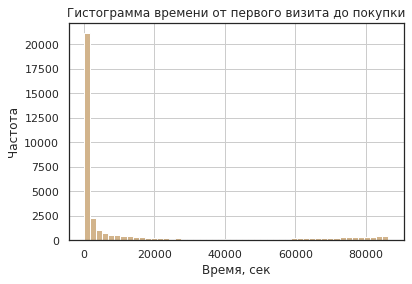

14949.881444569175

960.0

0    60
dtype: int64

In [21]:
first_visit_order['time_to_order'] = (first_visit_order['first_order'] - first_visit_order['first_visit']).dt.seconds

hist(first_visit_order, 
     'time_to_order', 
     'tan', 
     'Гистограмма времени от первого визита до покупки', 
     'Время, сек',
     'Частота')

display(first_visit_order['time_to_order'].mean())
display(first_visit_order['time_to_order'].median())
first_visit_order['time_to_order'].mode()

### 2.2.2 Среднее количество покупок на одного клиента за 6 месяцев, расчет с применением когортного анализа. <a id="cnt_order"></a>

In [22]:
orders = orders.join(first_order_date_by_customers, on='Uid')
orders['first_order_month'] = orders['first_order'].astype('datetime64[M]')
orders

,Buy Ts,Revenue,Uid,first_order,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-01


In [23]:
# посчитаем количество покупателей в каждой когорте
first_orders = orders.loc[:, ['Uid', 'first_order_month']]
cohort_sizes = (first_orders.groupby('first_order_month')
                            .agg({'Uid': 'nunique'})
                            .reset_index()
               )
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes

# округлим дату первого заказа и дату нынешнего заказа до месяца для создания когорт
orders['first_order_month'] = orders['first_order'].astype('datetime64[M]')
orders['order_month'] = orders['Buy Ts'].astype('datetime64[M]')

# посчитаем для когорт lifetime
orders['cohort_lifetime'] = orders['order_month'] - orders['first_order_month']
orders['cohort_lifetime'] = orders['cohort_lifetime'] / np.timedelta64(1,'M')
orders['cohort_lifetime'] = orders['cohort_lifetime'].apply(np.round).astype('int')

# посчитаем количество уникальных заказов в каждой когорте в каждый месяц
cohorts_orders = (orders.groupby(['first_order_month','cohort_lifetime'])
                        .agg({'Uid':'nunique'})
                        .reset_index()
                 )

# сводная таблица, сгруппируем по когорте, для каждого месяца lifetime
# и посчитаем среднее количество покупок в месяц на пользователя
cohorts_orders_pivot = (cohorts_orders.pivot_table(index='first_order_month', 
                                                   columns='cohort_lifetime', 
                                                   values='Uid', aggfunc='sum')
                                      .cumsum(axis=1).copy()
                                      .reset_index()
                       )

cohorts_orders_pivot[5].mean()
(cohorts_orders_pivot[5]/cohort_sizes['n_buyers']).mean()

1.1432771617579576

### 2.2.3 Средняя выручка с пользователя и изменение во времени. <a id="rev_user"></a>

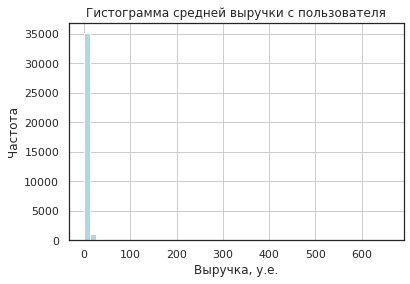

6.901327930345262

In [24]:
# сгруппируем orders по пользователям, посчитаем сумму дохода с каждого и разделим на их количество

mean_revenue = orders.groupby('Uid').agg({'Revenue': 'sum', 'Uid':'count'})
mean_revenue['mean'] = mean_revenue['Revenue']/mean_revenue['Uid']

hist(mean_revenue, 
     'mean', 
     'lightblue', 
     'Гистограмма средней выручки с пользователя', 
     'Выручка, у.е.',
     'Частота')

result = mean_revenue['Revenue'].sum()/mean_revenue['Uid'].count()
result

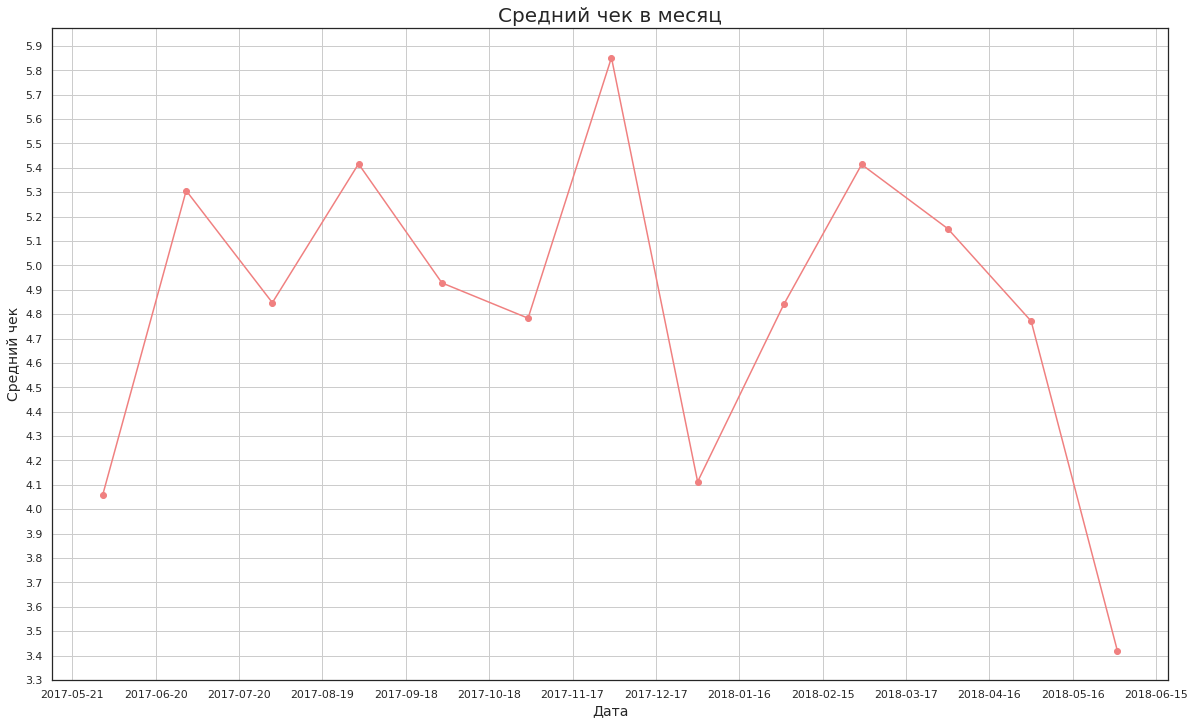

In [25]:
# ананлогично посчитаем средний доход с пользователей по месяцам
mean_rev_month = orders.groupby('order_month').agg({'Revenue': 'sum', 'Uid':'count'})
mean_rev_month['mean'] = mean_rev_month['Revenue']/mean_rev_month['Uid']
mean_rev_month.reset_index(inplace=True)

x_rev_month = mean_rev_month['order_month']
y_rev_month = mean_rev_month['mean']
plot(x_rev_month, 
     y_rev_month, 
     'Средний чек в месяц', 
     'Дата', 
     'Средний чек', 
     30, 
     0.1, 
     'lightcoral')

### Вывод

Гистограмма средней выручки непоказательна, так как говорит только о наличии большого количества маленьких значений. График распределения средней выручки по месяцам показывает, что средний чек стабильный. Распределение колеблется около среднего значения.
    
Средний чек покупателя = 6.901

### 2.2.4 Расчет LTV по когортам <a id="ltv"></a>

In [26]:
# добавим источник первого визита для будущего расчета ROMI (в пункте 2.3.3)
first_visit_source = visits.groupby('Uid')['Source Id'].agg({'Start Ts':'min'})
first_visit_device = visits.groupby('Uid')['Device'].agg({'Start Ts':'min'})

orders = orders.join(first_visit_source,on='Uid')
orders = orders.join(first_visit_device,on='Uid', rsuffix=1)
orders.rename(columns={'Start Ts':'first_vis_source', 'Start Ts1':'first_device'}, inplace=True)
orders

,Buy Ts,Revenue,Uid,first_order,first_order_month,order_month,cohort_lifetime,first_vis_source,first_device
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,0,1,desktop
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,0,2,desktop
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,0,2,desktop
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,0,2,desktop
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,0,3,desktop
...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-01,2018-05-01,0,4,desktop
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-01,2018-05-01,0,10,desktop
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-01,2018-05-01,0,3,desktop
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-01,2018-05-01,0,3,desktop


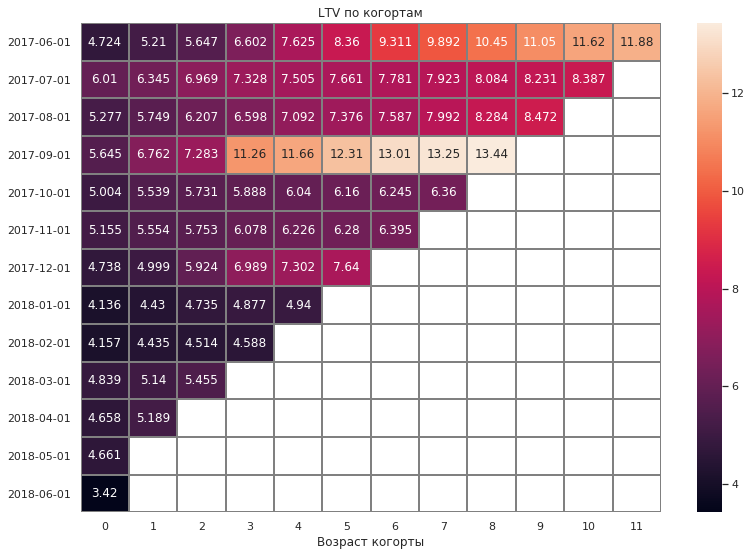

In [27]:
# посчитаем количество покупателей в каждой когорте
first_orders = orders.loc[:, ['Uid', 'first_order_month']]
cohort_sizes = (first_orders.groupby('first_order_month')
                            .agg({'Uid': 'nunique'})
                            .reset_index()
               )
cohort_sizes.columns = ['first_order_month', 'n_buyers']

# посчитаем сумму покупок в каждой когорте за каждый месяц
cohorts_ltv = (orders.groupby(['first_order_month','order_month'])
                     .agg({'Revenue': 'sum'})
                     .reset_index()
              )

# соединим две таблицы
ltv = pd.merge(cohorts_ltv, cohort_sizes, on='first_order_month')

# рассчитаем возраст когорты
ltv['age'] = (ltv['order_month'] - ltv['first_order_month']) / np.timedelta64(1, 'M')
ltv['age'] = ltv['age'].round().astype('int')

# посчитаем LTV, разделив сумму покупок в когорте на количество покупателей
ltv['ltv'] = ltv['Revenue'] / ltv['n_buyers']

# создадим сводную таблицу и построим тепловую карту
ltv_pivot = (ltv.pivot_table(index='first_order_month', 
                             columns='age', 
                             values='ltv', 
                             aggfunc='mean')
                .cumsum(axis=1).copy()
            )

ltv_pivot.index = ltv_pivot.index.strftime('%Y-%m-%d')
ltv_pivot = ltv_pivot.round(3)

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV по когортам')
ax = sns.heatmap(ltv_pivot, annot=True, fmt='.4', linewidths=1, linecolor='gray')
ax.set_xlabel('Возраст когорты')
plt.show()

In [28]:
ltv_pivot

age,0,1,2,3,4,5,6,7,8,9,10,11
2017-06-01,4.724,5.210,5.647,6.602,7.625,8.360,9.311,9.892,10.445,11.051,11.622,11.879
2017-07-01,6.010,6.345,6.969,7.328,7.505,7.661,7.781,7.923,8.084,8.231,8.387,NaN
2017-08-01,5.277,5.749,6.207,6.598,7.092,7.376,7.587,7.992,8.284,8.472,NaN,NaN
2017-09-01,5.645,6.762,7.283,11.259,11.659,12.306,13.008,13.251,13.435,NaN,NaN,NaN
2017-10-01,5.004,5.539,5.731,5.888,6.040,6.160,6.245,6.360,NaN,NaN,NaN,NaN
2017-11-01,5.155,5.554,5.753,6.078,6.226,6.280,6.395,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738,4.999,5.924,6.989,7.302,7.640,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.136,4.430,4.735,4.877,4.940,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.157,4.435,4.514,4.588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01,4.839,5.140,5.455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
ltv_pivot[5][:6].mean()

8.023833333333334

LTV для пользователей ПК

8.556333333333333

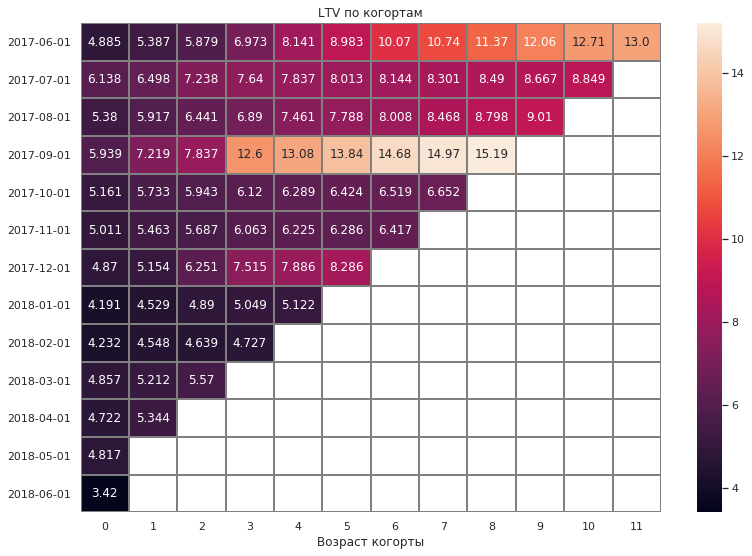

In [30]:
orders_desktop = orders.query('first_device == "desktop"')
orders_touch = orders.query('first_device == "touch"')

def ltv_device(data):
    first_orders1 = data.loc[:, ['Uid', 'first_order_month']]
    cohort_sizes1 = (first_orders1.groupby('first_order_month')
                                .agg({'Uid': 'nunique'})
                                .reset_index()
                   )
    cohort_sizes1.columns = ['first_order_month', 'n_buyers']
    cohorts_ltv1 = (data.groupby(['first_order_month','order_month'])
                        .agg({'Revenue': 'sum'})
                        .reset_index()
                    )
    ltv1 = pd.merge(cohorts_ltv1, cohort_sizes1, on='first_order_month')
    ltv1['age'] = (ltv1['order_month'] - ltv1['first_order_month']) / np.timedelta64(1, 'M')
    ltv1['age'] = ltv1['age'].round().astype('int')
    ltv1['ltv'] = ltv1['Revenue'] / ltv1['n_buyers']
    ltv_pivot1 = (ltv1.pivot_table(index='first_order_month', 
                                 columns='age', 
                                 values='ltv', 
                                 aggfunc='mean')
                     .cumsum(axis=1).copy()
                )
    ltv_pivot1.index = ltv_pivot1.index.strftime('%Y-%m-%d')
    ltv_pivot1 = ltv_pivot1.round(3)
    display(ltv_pivot1[5][:6].mean())
    sns.set(style='white')
    plt.figure(figsize=(13, 9))
    plt.title('LTV по когортам')
    ax = sns.heatmap(ltv_pivot1, annot=True, fmt='.4', linewidths=1, linecolor='gray')
    ax.set_xlabel('Возраст когорты')
    plt.show()
    
ltv_device(orders_desktop)

LTV для пользователей с телефона

5.073

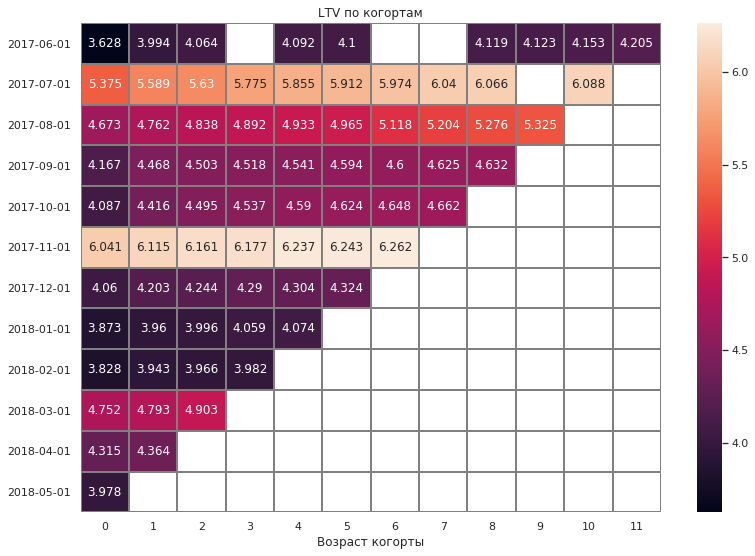

In [31]:
ltv_device(orders_touch)

### Вывод

Средний LTV для пользователей с ПК (первые 6 когорт за 6 месяцев): 8.556
    
Средний LTV для пользователей с телефона (первые 6 когорт за 6 месяцев): 5.073
    
То есть, мы видим, что у пользователей с ПК LTV выше. 

### Метрики электронной коммерции. Вывод <a id="electronicssum"></a>

* 2.2.1 Среднее время от первого визита до покупки.

Мы видим, что среднее время от первого визита до покупки - 62587 сек, медиана - 83760, при этом мода = 0.

По гистограмме видно, что наиболее часто проходит больше 80000 сек до покупки. Но мы также видим, что распределение сдвинуто к полюсам оси Х, а это значит, что покупатели проводят либо очень мало времени от первого визита до покупки, либо достаточно много. 

* 2.2.2 Среднее количество покупок на одного клиента за 6 месяцев, расчет с применением когортного анализа.

Среднее количество покупок на одного клиента за 6 месяцев = 6.

* 2.2.3 Средняя выручка с пользователя и изменение во времени.

Гистограмма средней выручки непоказательна, так как говорит только о наличии большого количества маленьких значений. График распределения средней выручки по месяцам показывает, что средний чек стабильный. Распределение колеблется около среднего значения.

Средний чек покупателя = 4.09

* 2.2.4 Расчет LTV по когортам.

С течением времени, LTV медленно растет. То есть, люди начинают чаще пользоваться сервисом. В когортах 2017-06б 2017-09 и 2017-12 показатель растет сильнее.


### 2.3 Маркетинговые метрики <a id="marketing"></a>

### 2.3.1 Распределение расходов на маркетинг <a id="revenues"></a>

In [32]:
sum_costs = costs['costs'].sum()
sum_costs

329131.62

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


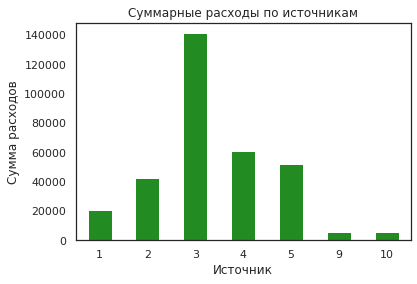

In [33]:
# сгруппируем расходы по источникам и построим график 
costs_source = (costs.groupby('source_id')
                     .agg({'costs':'sum'})
                     .reset_index()
               )
display(costs_source)

costs_source.plot.bar(x='source_id', y='costs', color='forestgreen', legend=False)
plt.xlabel('Источник')
plt.ylabel('Сумма расходов')
plt.title('Суммарные расходы по источникам')
plt.xticks(rotation=360)
plt.show()


In [34]:
# для удобной подписи осей отрежем год и месяц от даты и запишем в один столбец
costs['month'] = costs['dt'].dt.month
costs['year'] = costs['dt'].dt.year
costs = costs.assign(year_month = costs['year'].astype(str) + '_' + costs['month'].astype(str))

# сводная таблица для построения графика расходов на источники по месяцам
costs_source_month = (costs.groupby(['source_id', 'year_month'])
                           .agg({'costs':'sum'})
                           .reset_index()
                     )

# преодоление ошибки seaborn для цифровых данных в hue
costs_source_month['source_id'].replace(1, 'id1', inplace=True)
costs_source_month['source_id'].replace(2, 'id2', inplace=True)
costs_source_month['source_id'].replace(3, 'id3', inplace=True)
costs_source_month['source_id'].replace(4, 'id4', inplace=True)
costs_source_month['source_id'].replace(5, 'id5', inplace=True)
costs_source_month['source_id'].replace(9, 'id9', inplace=True)
costs_source_month['source_id'].replace(10, 'id10', inplace=True)

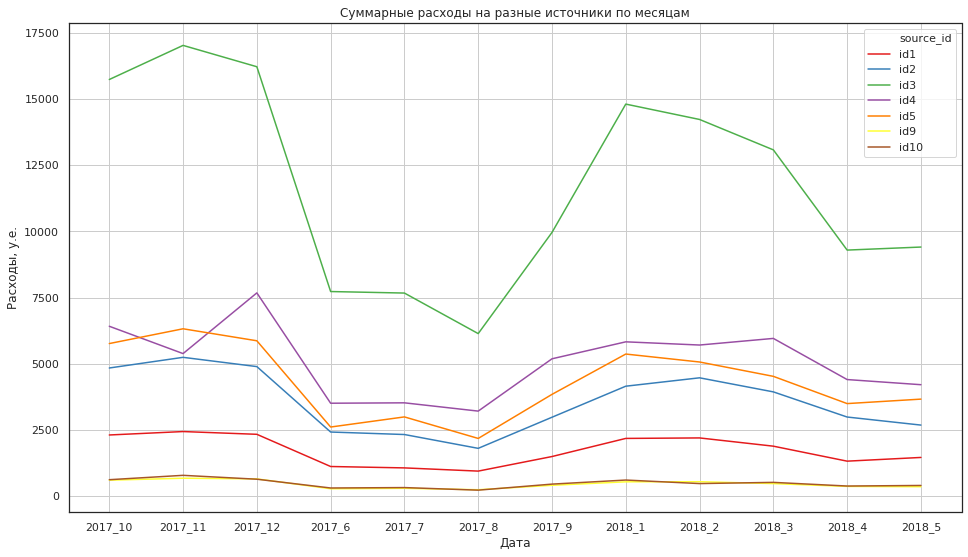

In [35]:
plt.figure(figsize=(16,9))
sns.lineplot(data=costs_source_month,
             x='year_month',
             y='costs',
             hue='source_id', 
             palette='Set1')
plt.grid()
plt.xlabel('Дата')
plt.ylabel('Расходы, у.е.')
plt.title('Суммарные расходы на разные источники по месяцам')
plt.show()

### Вывод

За весь период на маркетинг было потрачено 329131.62 у.е. Больше всего - на источники 3, чуть меньше на 4, 5 и 2. Меньше всего - на источники 9 и 10.


### 2.3.2 САС <a id="cac"></a>

,source_id,cac
0,1,1.097
1,2,1.631
2,3,1.890
3,4,0.731
4,5,0.908
7,9,0.596
8,10,0.722


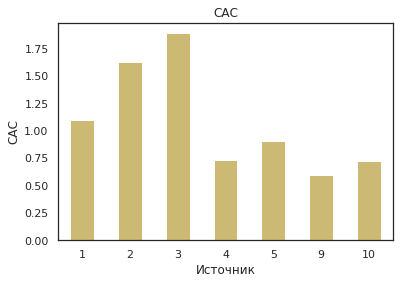

In [36]:
# посчитаем количество пользователей по источникам
visits_source = (visits.groupby('Source Id')
                       .agg({'Uid':'nunique'})
                       .reset_index()
                )
visits_source.set_axis(['source_id', 'n_visitors'], axis='columns', inplace=True)

# посчитаем затраты на источники
costs_source = (costs.groupby('source_id')['costs'].sum()
                     .reset_index()
               )

# объединим таблицы и посчитаем САС, разделив затраты на количество пользователей
cac = pd.merge(visits_source, 
               costs_source, 
               on='source_id', 
               how='outer')
cac['cac'] = cac['costs']/cac['n_visitors']
cac.dropna(inplace=True)
cac_show = cac.loc[:, ['source_id', 'cac']]
cac_show['cac'] = cac_show['cac'].round(3)
display(cac_show)

cac.plot.bar(x='source_id', y='cac', color='y', legend=False)
plt.xlabel('Источник')
plt.ylabel('СAC')
plt.title('СAC')
plt.xticks(rotation=360)
plt.show()

Построим график с количеством посетителей из разных источников, чтобы позже можно было оценить приоритетность источника. 

,source_id,n_buyers
0,1,7138
1,2,5336
2,3,9619
3,4,8138
4,5,4879
5,7,1
6,9,527
7,10,885


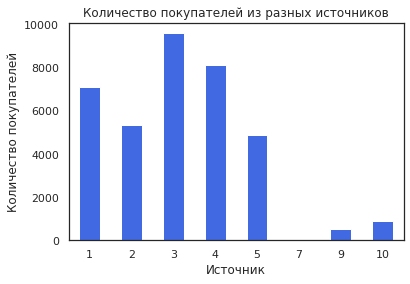

In [37]:
orders_source = (orders.groupby('first_vis_source')
                       .agg({'Uid':'nunique'})
                       .reset_index()
                )
orders_source.set_axis(['source_id', 'n_buyers'], axis='columns', inplace=True)
display(orders_source)

orders_source.plot.bar(x='source_id', y='n_buyers', color='royalblue', legend=False)
plt.xlabel('Источник')
plt.ylabel('Количество покупателей')
plt.title('Количество покупателей из разных источников')
plt.xticks(rotation=360)
plt.show()

### Вывод

Дороже всего стоит привлечение клиента из 3 и 2 источника. Дешевле всего - из 9 и 10. На графике четко видно, что не по всем источникам есть информация для расчета САС.

Больше всего покупателей приходят из источников 3, 4 и 1.


In [38]:
cac_buyer = pd.merge(costs_source, orders_source, on='source_id')
cac_buyer['cac_buyer'] = cac_buyer['costs']/cac_buyer['n_buyers']
cac_buyer

,source_id,costs,n_buyers,cac_buyer
0,1,20833.27,7138,2.918642
1,2,42806.04,5336,8.022121
2,3,141321.63,9619,14.691925
3,4,61073.60,8138,7.504743
4,5,51757.10,4879,10.608137
5,9,5517.49,527,10.469620
6,10,5822.49,885,6.579085


### 2.3.3 ROMI <a id="romi"></a>

In [39]:
# сгруппируем покупателей по источнику первого визита(эти данные были добавлены в пункте 2.2.4)
# и по когортам
cohorts_for_romi = (orders.groupby(['first_vis_source', 'first_order_month','order_month'])
                     .agg({'Revenue': 'sum', 'Uid':'nunique'})
                     .reset_index()
                   )
# функция для подсчета LTV по срезу (по номеру источника)
def ltv(element):
    number = element
    source1 = cohorts_for_romi.query('first_vis_source == @number')
    source1['age'] = (source1['order_month'] - source1['first_order_month']) / np.timedelta64(1, 'M')
    source1['age'] = source1['age'].round().astype('int')
    source1['ltv'] = source1['Revenue'] / source1['Uid']
    source1_pivot = (source1.pivot_table(index='first_order_month',
                                             columns='age', 
                                             values='ltv', 
                                             aggfunc='mean')
                                .cumsum(axis=1).copy()
            )
    return source1_pivot[5].sum()

# добавим значения номеров источника в лист, применим функцию
sources = cohorts_for_romi['first_vis_source'].unique()
list_sources = sources.tolist()

# добавим исключения, поскольку какая-то когорта могла просуществовать меньше 6 месяцев
list_ltv = []
for i in list_sources:
    try:
        list_ltv.append(ltv(i))
    except:
        list_ltv.append('Error')
list_ltv


[1088.9634632471577,
 727.0973298676414,
 172.37362147959453,
 183.84464612499374,
 157.49093188715847,
 'Error',
 15.339128205128205,
 11.55418918918919]

In [40]:
# создадим датафрейм, где рассчитаем ROMI для каждого источника
df = pd.DataFrame({'source_id': list_sources, 'ltv': list_ltv})
romi = pd.merge(df, cac, on='source_id')


,source_id,ROMI
0,1,993.085
1,2,445.794
2,3,91.1818
3,4,251.428
4,5,173.365
5,9,25.7548
6,10,16.0082


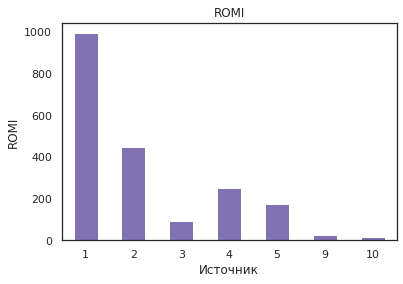

In [41]:
romi['ROMI'] = romi['ltv']/romi['cac']
romi_show = romi.loc[:, ['source_id', 'ROMI']]

display(romi_show)
romi.plot.bar(x='source_id', y='ROMI', color='m', legend=False)
plt.xlabel('Источник')
plt.ylabel('ROMI')
plt.title('ROMI')
plt.xticks(rotation=360)
plt.show()


In [42]:
visits_and_revenue = (orders.join(visits.sort_values(by='Start Ts')
                                        .groupby('Uid')
                                        .agg({'Source Id': 'first', 'Device': 'first', 'Start Ts': 'min'}), on='Uid', how='inner')
                     )
source_rev = visits_and_revenue.groupby('Source Id')['Revenue'].sum().reset_index()

In [43]:
source_rev.rename(columns={'Source Id':'source_id'}, inplace=True)

romi_source = pd.merge(romi, source_rev, on='source_id')
romi_source['Romi_source'] = romi_source['Revenue']/romi_source['costs']

In [44]:
romi_source.loc[:, ['source_id', 'costs', 'Revenue', 'Romi_source']]

,source_id,costs,Revenue,Romi_source
0,1,20833.27,31090.55,1.492351
1,2,42806.04,46923.61,1.096191
2,3,141321.63,54511.24,0.385725
3,4,61073.60,56696.83,0.928336
4,5,51757.10,52624.02,1.016750
5,9,5517.49,5759.40,1.043844
6,10,5822.49,4450.33,0.764335


In [45]:
cohorts_for_cac = (orders.groupby(['first_vis_source', 'first_order_month','order_month'])
                     .agg({'Revenue': 'sum', 'Uid':'nunique'})
                     .reset_index()
                   )
cohorts_for_cac.rename(columns={'first_vis_source':'source_id'}, inplace=True)
cohorts_new = pd.merge(cohorts_for_cac, costs, on='source_id')


Источник 1


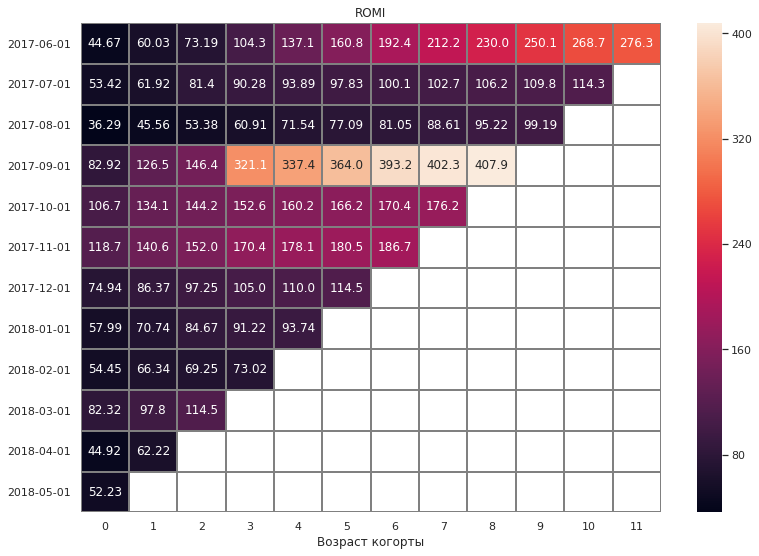

Источник 2


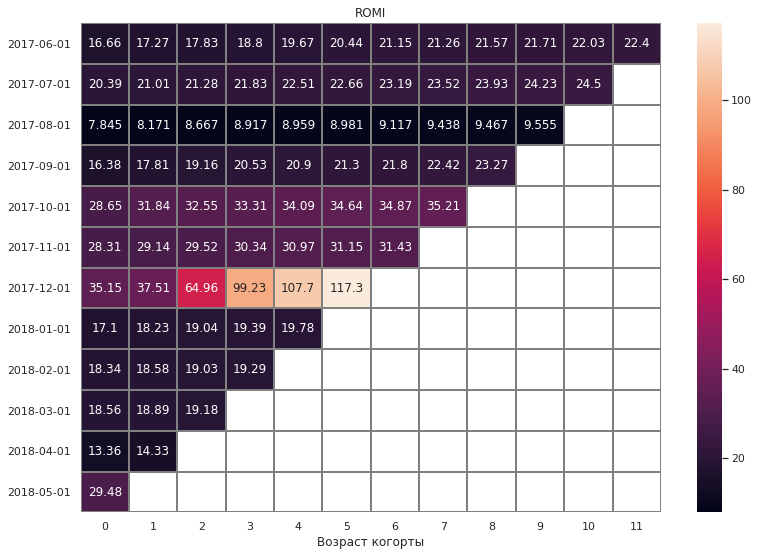

Источник 3


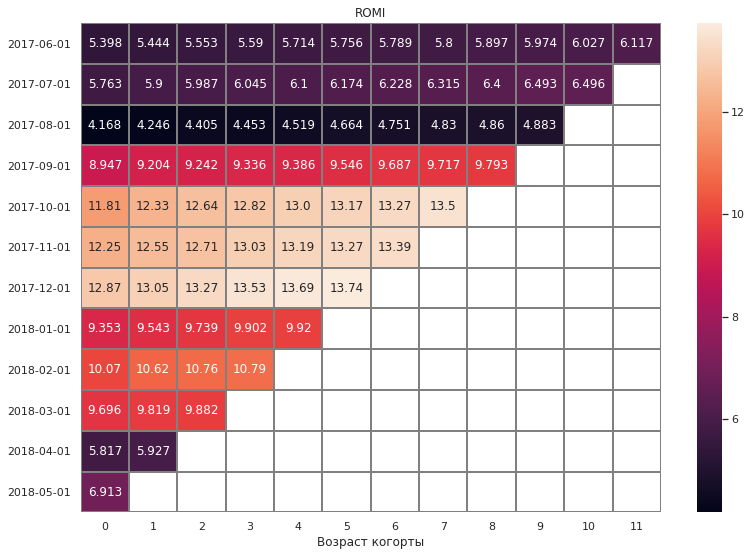

Источник 4


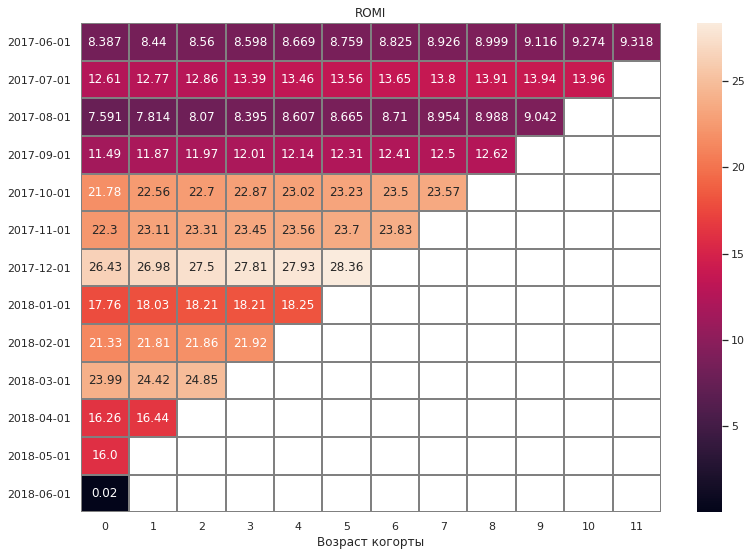

Источник 5


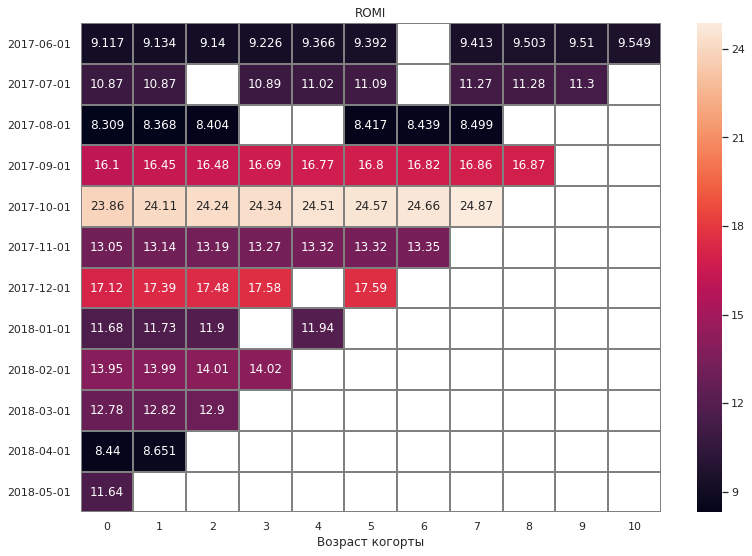

Источник 9


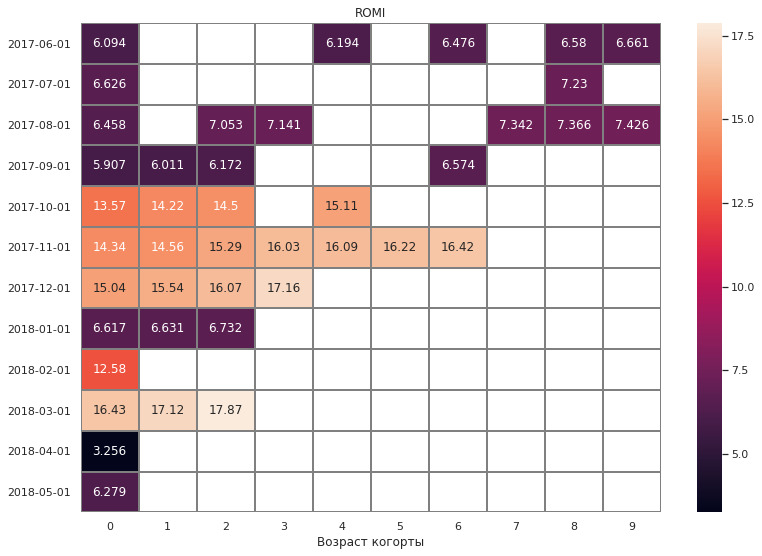

Источник 10


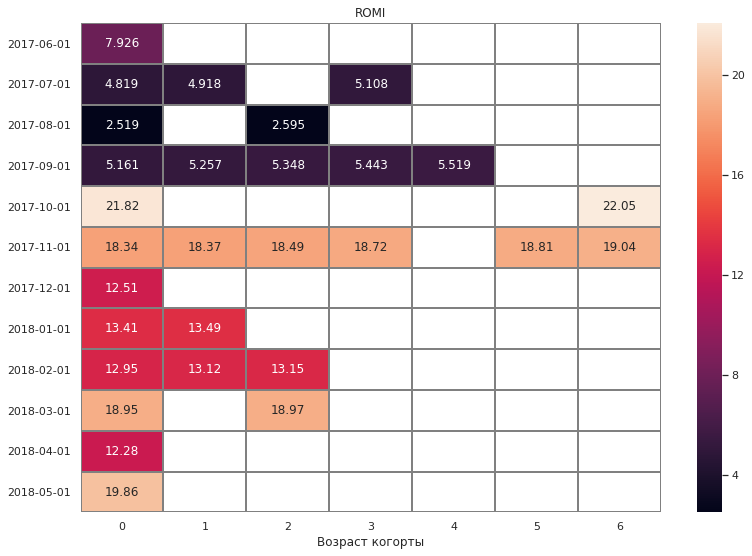

[None, None, None, None, None, 'Error', None, None]

In [46]:
cohorts_cac = (cohorts_new.groupby(['source_id', 'first_order_month','order_month'])
                          .agg({'Revenue': 'sum', 'Uid':'nunique', 'costs':'sum'})
              )
def romi(element):
    number = element
    source2 = cohorts_cac.query('source_id == @number')
    source2.reset_index(inplace = True)
    source2['age'] = (source2['order_month'] - source2['first_order_month']) / np.timedelta64(1, 'M')
    source2['age'] = source2['age'].round().astype('int')
    source2['ROMI'] = source2['Revenue'] / source2['costs']
    
    source2_pivot = (source2.pivot_table(index='first_order_month',
                                             columns='age', 
                                             values='ROMI', 
                                             aggfunc='mean')
                                .cumsum(axis=1).copy()
            )
    source2_pivot.index = source2_pivot.index.strftime('%Y-%m-%d')
    source2_pivot = source2_pivot.round(3)
    print('Источник', element)
    sns.set(style='white')
    plt.figure(figsize=(13, 9))
    plt.title('ROMI')
    ax = sns.heatmap(source2_pivot, annot=True, fmt='.4', linewidths=1, linecolor='gray')
    ax.set_xlabel('Возраст когорты')
    plt.show()
    
list_romi = []
for i in list_sources:
    try:
        list_romi.append(romi(i))
    except:
        list_romi.append('Error')
list_romi




### Вывод

Мы видим, что все источники окупаются. Лучше всего окупается источник 1 (Romi=1.49), чуть меньше 2 (Romi=1.09). Хуже всего - источник 3 (Romi=0.3).

### Маркетинговые метрики. Вывод <a id="marketingsum"></a>

* 2.3.1 Распределение расходов на маркетинг.

За весь период на маркетинг было потрачено 329131.62 у.е. Больше всего - на источники 3, чуть меньше на 4, 5 и 2. Меньше всего - на источники 9 и 10.

* 2.3.2 САС.

Дороже всего стоит привлечение клиента из 3 и 2 источника. Дешевле всего - из 9 и 10. На графике четко видно, что не по всем источникам есть информация для расчета САС. 

* 2.3.3 ROMI.

Мы видим, что все источники окупаются. Лучше всего окупается источник 1 (Romi=1.49), чуть меньше 2 (Romi=1.09). Хуже всего - источник 3 (Romi=0.3).

* [В начало](#navigation)

## 3. Выводы и рекомендации <a id="bigsum"></a>

### 3.1. Отличия метрик в разрезе устройств, наиболее важные источники трафика и устройства. <a id="important"></a>

В данных указано два типа устройств, с которых заходят пользователи: ПК и мобильная версия. 

DAU ПК = 659, DAU мобильной версии = 252. В день с обоих устройст в среднем пользователи совершают одно посещение сайта. Средняя продолжительность визита на обоих устройствах 60 секунд. 

LTV пользователей ПК выше, чем пользователей с телефона.

Также указано 10 источников трафика. Больше всего покупателей приходят из источников 3, 4 и 1.

Мы можем сделать вывод, что пользователи чаще заходят на сайт с ПК. По источникам трафика можно порекомендовать обратить внимание на более окупающиеся источники - 1 и 2.

### 3.2. Выводы по маркетинговым и продуктовым метрикам и метрик электронной коммерции. <a id="diff_metrics"></a>

Продуктовые метрики. 

* Количество уникальных пользователей растет с течением времени. Мы видим общий рост с сентября 2017 по март 2018, это может говорить о сезонности востребованности сервиса. 
* Среднее количество визитов в день = 1. Пользователю нет необходимости повторно возвращаться на сайт, он все делает за один визит.
* В среднем, визит длится 60 секунд. Необходимо понять, успевает ли покупатель сделать заказ за это время. 
* Коэффициент удержания медленно снижается с увеличением времени жизни когорты. Покупатели все меньше возвращаются, чтобы сделать заказ. 

Метрики электронной коммерции.

* Мы видим, что среднее время от первого визита до покупки - 65614 сек, медиана - 84840, мода - 86340. Так как распределение времени ненормальное, среднее время от первого визита до первой покупки определяется по моде. Оно равно 86340 сек.
* Среднее количество покупок на одного клиента за 6 месяцев - 1.14.
* Средняя выручка достаточно маленькая (4.09 у.е.), но стабильная. Распределение колеблется около среднего значения.
* С течением времени LTV медленно растет. В когортах 2017-06, 2017-09 и 2017-12 LTV растет быстрее. лей возрастает.

Маркетинговые метрики. 

* За весь период на маркетинг было потрачено 329131.62 у.е. Больше всего - на источники 3, чуть меньше на 4, 5 и 2. Меньше всего - на источники 9 и 10.
* Дороже всего стоит привлечение клиента из 3 и 2 источника. Дешевле всего - из 9 и 10. 
* Мы видим, что все источники окупаются. Лучше всего окупается источник 1 (Romi=1.49), чуть меньше 2 (Romi=1.09). Хуже всего - источник 3 (Romi=0.3).

### 3.3. Итоги когортного анализа. Наиболее перспективные для компании когорты клиентов. <a id="cohortssum"></a>

Retention Rate. 

* В целом, коэффициет медленно снижается. Изменения стали более видимыми с октября 2017 (когорта 2017-10), RR уменьшается больше, чем до этого. Это может быть связано с обновлением сервиса или в целом со снижением его популярности.

LTV по когортам. 

* С течением времени LTV медленно растет. В когортах 2017-06, 2017-09 и 2017-12 LTV растет быстрее. 

Таким образом, делаем вывод, что наиболее перспективные на данный момент когорты - это 2017-06, 2017-09 и 2017-12. 

* [В начало](#navigation)